### Calculating seasonal composites and seasonal anomolies for day/night MODIS Aqua data over PG County

##### 1. Import Packages

In [1]:
import gdown #for downloading from google drive
import zipfile, os #for unzipping the files
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
import zipfile
import os

#### 2. Unzip .tiff files from google drive with ZIPFILE

In [70]:
def extractZip(zip_file_path, extract_dir):
    # Create the directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Iterate through each file in the zip file
        for file_info in zip_ref.infolist():
            # Check if the file is a .tif file
            if file_info.filename.endswith('.tif'):
                # Extract the .tif file to the specified directory
                zip_ref.extract(file_info, extract_dir)

    # List the extracted .tif files to confirm extraction
    extracted_tif_files = [f for f in os.listdir(extract_dir) if f.endswith('.tif')]
    print("Extracted .tif files:", len(extracted_tif_files))
    
#Define Season, path to zip file, and directory for unziped files
SEASON = 'Dec'
TOD = 'Night'
zip_file_path = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/{SEASON}_2002_2023_{TOD}time_Aqua.zip'
extract_dir = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/{SEASON}/'

#Run Method
extractZip(zip_file_path, extract_dir)

Extracted .tif files: 682


rename all files by their date, save composites of month

In [ ]:
season = 'Dec'
TOD = 'Night'
directory = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/{season}/'
lookupDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/{TOD}time.csv')
tifFiles = []
import os
for file in os.listdir(directory): #Go thru and rename
    if '.tif' in file:
        #get the rename for the date
        rawName = file
        print(f'\n{rawName}')
        modName = f'{rawName}_DEC_DJF_{TOD}'
        targetLookup = lookupDf[lookupDf['ID'] == modName]
        reName_date = targetLookup.iloc[0]['time_1'].replace('/', '-')
        reName = f'{reName_date}.tif'
        print(reName)
        os.rename(f'{directory}{file}', f'{directory}{reName}')


0Night1.tif
12-1-2002.tif

100Night1.tif
12-8-2005.tif

101Night1.tif
12-9-2005.tif

102Night1.tif
12-10-2005.tif

103Night1.tif
12-11-2005.tif

104Night1.tif
12-12-2005.tif

105Night1.tif
12-13-2005.tif

106Night1.tif
12-14-2005.tif

107Night1.tif
12-15-2005.tif

108Night1.tif
12-16-2005.tif

109Night1.tif
12-17-2005.tif

10Night1.tif
12-11-2002.tif

110Night1.tif
12-18-2005.tif

111Night1.tif
12-19-2005.tif

112Night1.tif
12-20-2005.tif

113Night1.tif
12-21-2005.tif

114Night1.tif
12-22-2005.tif

115Night1.tif
12-23-2005.tif

116Night1.tif
12-24-2005.tif

117Night1.tif
12-25-2005.tif

118Night1.tif
12-26-2005.tif

119Night1.tif
12-27-2005.tif

11Night1.tif
12-12-2002.tif

120Night1.tif
12-28-2005.tif

121Night1.tif
12-29-2005.tif

122Night1.tif
12-30-2005.tif

123Night1.tif
12-31-2005.tif

124Night1.tif
12-1-2006.tif

125Night1.tif
12-2-2006.tif

126Night1.tif
12-3-2006.tif

127Night1.tif
12-4-2006.tif

128Night1.tif
12-5-2006.tif

129Night1.tif
12-6-2006.tif

12Night1.tif
12-13-200

In [3]:
season = 'JF'
TOD = 'Night'
monthOfInterest = '1'
directory = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/{season}/'
tifFiles = []
for file in os.listdir(directory):
    if '.tif' in file:
        if (str(file)[0] == monthOfInterest): #modified for 2 digit month: [0:2] instead of [0]
            tifFiles.append(file)
print(tifFiles[0:5])
print(f'Files: {len(tifFiles)}')

['1-1-2003.tif', '1-1-2020.tif', '1-2-2020.tif', '1-3-2020.tif', '1-4-2020.tif']
Files: 651


In [4]:
ID = tifFiles[0]
def openTif(ID):
    fn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/{season}/{ID}'
    geotiff_da = rioxarray.open_rasterio(fn)
    geotiff_ds = geotiff_da.to_dataset('band')
    geotiff_ds = geotiff_ds.where(geotiff_ds[1] != 0)  
    geotiff_ds = geotiff_ds.assign_coords({'date': str(ID)[0:-4]})
    geotiff_ds = geotiff_ds.assign_coords({'time': TOD})
    return(geotiff_ds)
tifTest = tifFiles[:]
data_arrays = [openTif(_id) for _id in tifTest]

composite_data_array = xr.concat(data_arrays, dim='date')
composite_data_array  = composite_data_array .rename_vars({1: 'LST'})
numFiles = (len(composite_data_array.date))
print(f'Arrays in use: {numFiles}')
composite_mean = composite_data_array.mean(dim='date', skipna=True)

#Save to .nc
startDate = str(tifTest[0][:-4])
endDate = str(tifTest[-1][:-4])
print(startDate,endDate)
nc_file_path = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Monthly/{monthOfInterest}_{TOD}.nc'  # Replace with your desired file path
print(f'Saved to {nc_file_path}')
composite_data_array.to_netcdf(nc_file_path)


KeyboardInterrupt



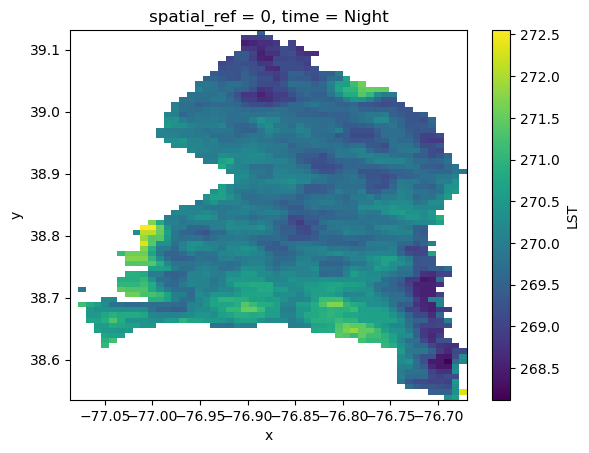

In [51]:
composite_mean['LST'].plot()
#composite_data_array

#### 3. Create composite monthly/yearly maps, ~240 maps and download them

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
shapefile_path = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/tl_2020_24033_faces.shp'
gdf = gpd.read_file(shapefile_path)

ERROR 1: PROJ: proj_create_from_database: Open of /home/slsmit34/.conda/envs/Py38/share/proj failed


In [2]:
def getYearlyDs(currentDs, YOI):
    # Select only the dates that contain '2003'
    dsYear = currentDs.sel(date=currentDs['date'].dt.year == YOI)
    dsAnomoly = dsYear.mean(dim='date', skipna=True) - currentDs.mean(dim='date', skipna=True).mean()
    print(currentDs.mean(dim='date', skipna=True).mean()['LST'].data)
    return(dsAnomoly, dsYear)
def savePlot(dsAvg, monthOfInterest, YOI):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthName = months[int(monthOfInterest)-1]
    # Plot
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    fig.set_figwidth(4)
    fig.set_figheight(4)
    colorScheme = 'plasma'
    cbar = dsAvg['LST'].plot(ax=ax, cmap=f'{colorScheme}_r',zorder = 2)
    # Read shapefile
    gdf.boundary.plot(ax=ax, edgecolor='black', alpha = 0,linewidth = .1,zorder = 3)
    # Set titles and labels
    ax.set_title(f'{monthName} {YOI} {TOD}time\nMODIS avg LST anomoly\nfrom monthly climatology')
    ax.set_xlabel('Longitude')  # Set the x-axis label
    ax.set_ylabel('Latitude')   # Set the y-axis label
    cbar.colorbar.set_label('Temperature Anomoly (°F)')  # Set the colorbar label

    # Add grid
    ax.grid(True,zorder = 0)
    output_filename = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Monthly/geotiffs/{YOI}_{monthOfInterest}_{TOD}.png'
    plt.savefig(output_filename, format='png')
    plt.show()
    
def saveTif(dsAvg, monthOfInterest, YOI):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthName = months[int(monthOfInterest)-1]
    # Export as GeoTIFF
    variable_to_export = dsAvg['LST']
    output_filename = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Monthly/geotiffs/{YOI}_{monthOfInterest}_{TOD}.tif'
    variable_to_export.rio.to_raster(output_filename)

In [8]:
months = ['1','2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12']
for monthOfInterest in months:
    print(monthOfInterest)
    TOD = 'Night'
    currentDs = xr.open_dataset(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Monthly/{monthOfInterest}_{TOD}.nc')
    currentDs['date'] = pd.to_datetime(currentDs['date'].values)
    currentDs['LST'] = (currentDs['LST'] - 273.15) * 9/5 + 32
    years = [year for year in range(2003,2024)]
    for YOI in years:
        print(YOI)
        meanDs,ds = getYearlyDs(currentDs,YOI)
        saveTif(meanDs, monthOfInterest, YOI)

1
2003
26.162799909899025
2004
26.162799909899025
2005
26.162799909899025
2006
26.162799909899025
2007
26.162799909899025
2008
26.162799909899025
2009
26.162799909899025
2010
26.162799909899025
2011
26.162799909899025
2012
26.162799909899025
2013
26.162799909899025
2014
26.162799909899025
2015
26.162799909899025
2016
26.162799909899025
2017
26.162799909899025
2018
26.162799909899025
2019
26.162799909899025
2020
26.162799909899025
2021
26.162799909899025
2022
26.162799909899025
2023
26.162799909899025
2
2003
28.201082660271773
2004
28.201082660271773
2005
28.201082660271773
2006
28.201082660271773
2007
28.201082660271773
2008
28.201082660271773
2009
28.201082660271773
2010
28.201082660271773
2011
28.201082660271773
2012
28.201082660271773
2013
28.201082660271773
2014
28.201082660271773
2015
28.201082660271773
2016
28.201082660271773
2017
28.201082660271773
2018
28.201082660271773
2019
28.201082660271773
2020
28.201082660271773
2021
28.201082660271773
2022
28.201082660271773
2023
28.2010

By season---


In [10]:
def getSeasonalDs(season,YOI, TOD):
    seasons = {
    'winter': [12, 1, 2],
    'spring': [3, 4, 5],
    'summer': [6, 7, 8],
    'autumn': [9, 10, 11]
    }
    #----A. MAKE COMBINED DS OF ALL MONTHLY DATA---
    # for each month in each season, load it as current ds 
    yearList = []
    for month in seasons[season]:
        print(month)
        dsTempBulk = xr.open_dataset(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Monthly/{month}_{TOD}.nc')
        yearList.append(dsTempBulk)
    #combine the list of dataframes into 1
    combined_ds = xr.concat(yearList, dim='date') #This is all years of the season
    
    #----B. MAKE DS OF ONLY YOI DATA----
    seasonList = []
    combined_ds['date'] = pd.to_datetime(combined_ds['date'].values, format='%m-%d-%Y')
    for month in seasons[season]:
        print(f'running {month}...')
        if str(12) in str(month):
            print('     12 is in month')
            dsTempYear = combined_ds.sel(date=((combined_ds['date'].dt.month == 12) & 
                                             (combined_ds['date'].dt.year == YOI - 1)))
        else:
            dsTempYear = combined_ds.sel(date=(combined_ds['date'].dt.month == month) & 
                                             (combined_ds['date'].dt.year == YOI))
        seasonList.append(dsTempYear)
    season_ds = xr.concat(seasonList, dim='date') #This is only YOI of the season
    
    #---C. CALCULATE ANOMOLY----
    dsAnomoly = season_ds.mean(dim='date', skipna=True) - combined_ds.mean(dim='date', skipna=True).mean()
    return(dsAnomoly)
def saveSeasonalTif(dsAvg, season, YOI, TOD):
    seasons = {
    'winter': 'DJF',
    'spring': 'MAM',
    'summer': 'JJA',
    'autumn': 'SON'
    }
    
    # Export as GeoTIFF
    variable_to_export = dsAvg['LST']
    output_filename = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Seasonal_tifs/{YOI}_{seasons[season]}_{TOD}.tif'
    variable_to_export.rio.to_raster(output_filename)
def saveSeasonalMap(dsAvg, season, YOI, TOD):
    seasons = {
    'winter': 'DJF',
    'spring': 'MAM',
    'summer': 'JJA',
    'autumn': 'SON'
    }

    # Plot
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    fig.set_figwidth(4)
    fig.set_figheight(4)
    colorScheme = 'plasma'
    cbar = dsAvg['LST'].plot(ax=ax, cmap=f'{colorScheme}_r',zorder = 2)
    # Read shapefile
    gdf.boundary.plot(ax=ax, edgecolor='black', alpha = 0,linewidth = .1,zorder = 3)
    # Set titles and labels
    ax.set_title(f'{season} ({seasons[season]}) {YOI} {TOD}time MODIS\nAvg LST anomoly from seasonal climatology')
    ax.set_xlabel('Longitude')  # Set the x-axis label
    ax.set_ylabel('Latitude')   # Set the y-axis label
    cbar.colorbar.set_label('Temperature Anomoly (°F)')  # Set the colorbar label

    # Add grid
    ax.grid(True,zorder = 0)
    
    # Export as png
    output_filename = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Seasonal_png/{YOI}_{season}_{TOD}.png'
    plt.savefig(output_filename, format='png')
    plt.show()

***RUNNING 2003, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


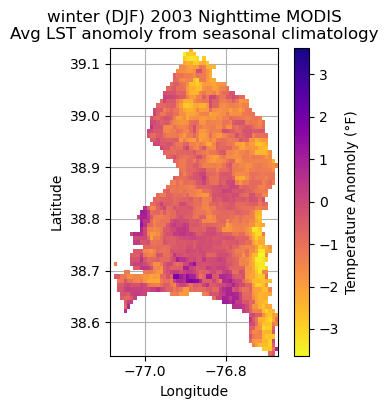

***RUNNING 2004, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


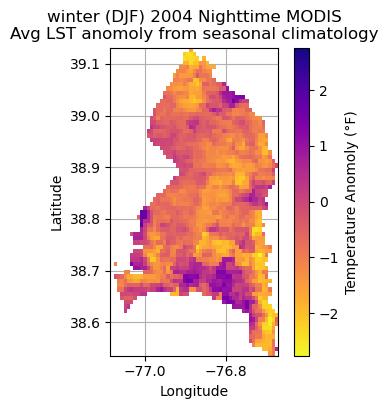

***RUNNING 2005, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


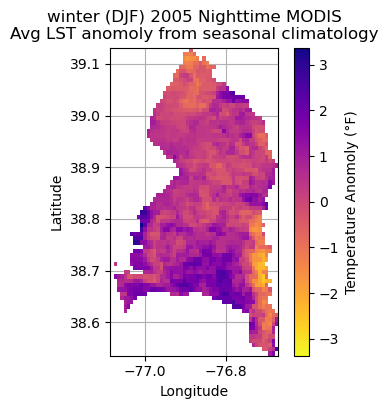

***RUNNING 2006, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


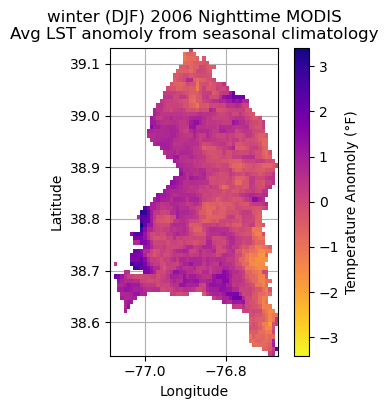

***RUNNING 2007, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


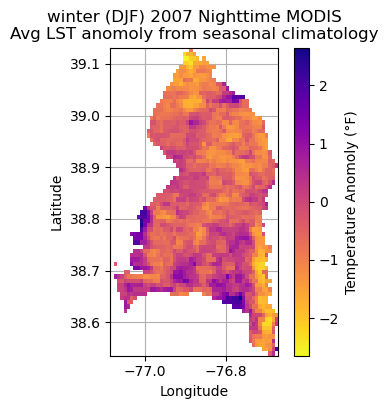

***RUNNING 2008, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


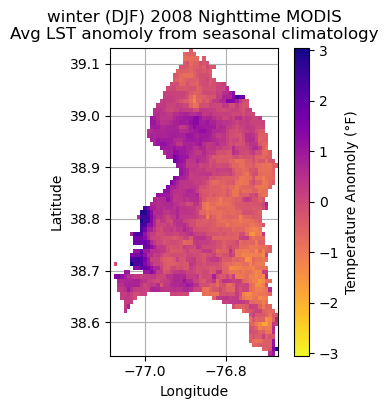

***RUNNING 2009, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


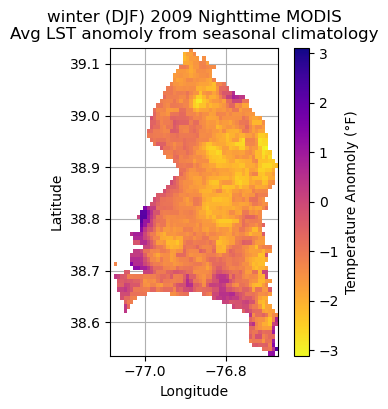

***RUNNING 2010, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


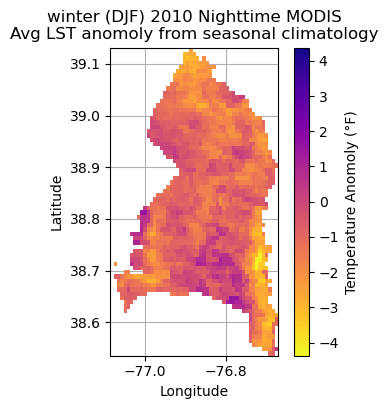

***RUNNING 2011, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


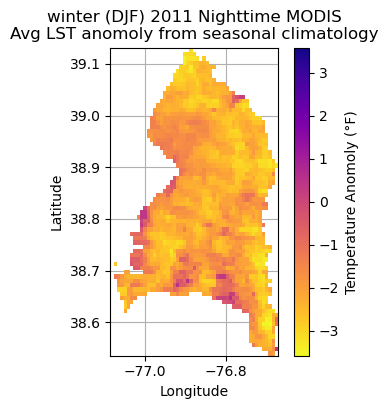

***RUNNING 2012, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


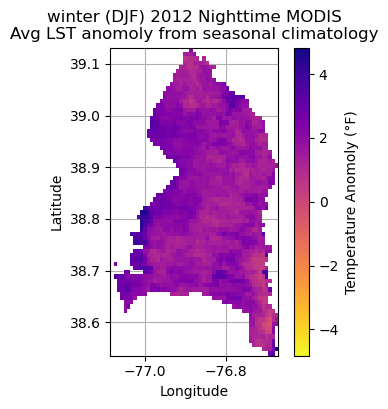

***RUNNING 2013, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


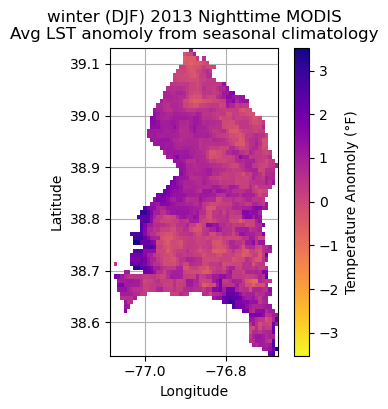

***RUNNING 2014, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


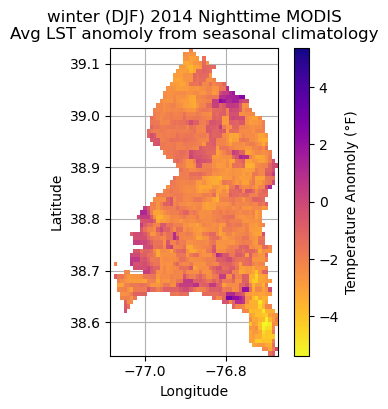

***RUNNING 2015, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


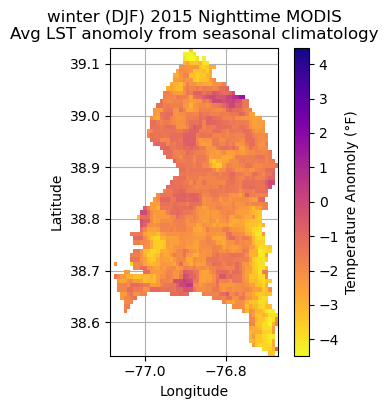

***RUNNING 2016, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


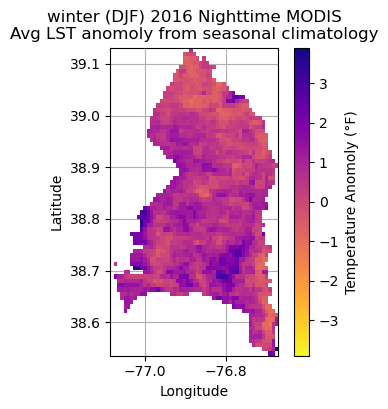

***RUNNING 2017, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


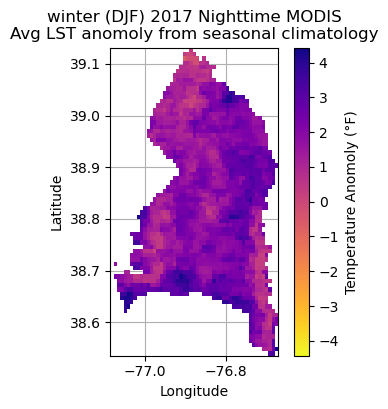

***RUNNING 2018, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


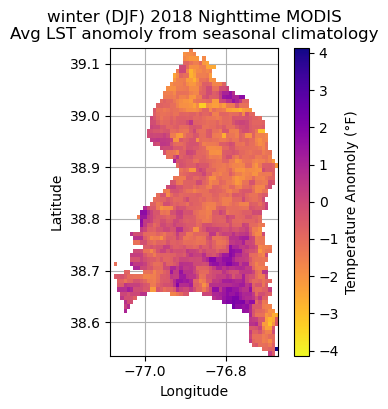

***RUNNING 2019, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


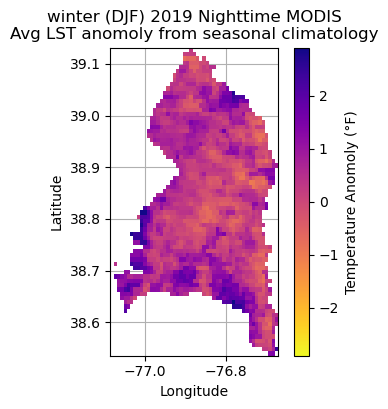

***RUNNING 2020, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


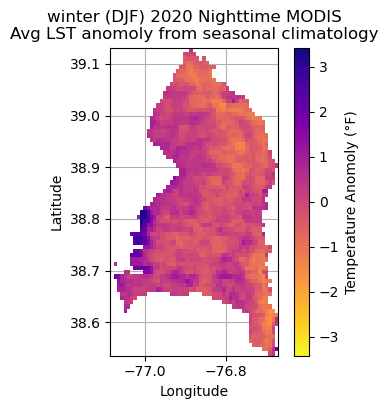

***RUNNING 2021, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


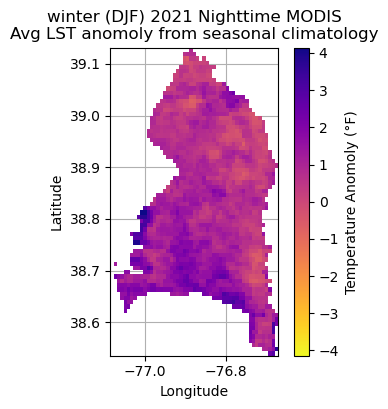

***RUNNING 2022, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


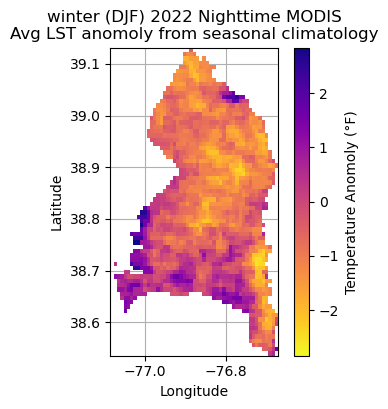

***RUNNING 2023, winter
12
1
2
running 12...
     12 is in month
running 1...
running 2...


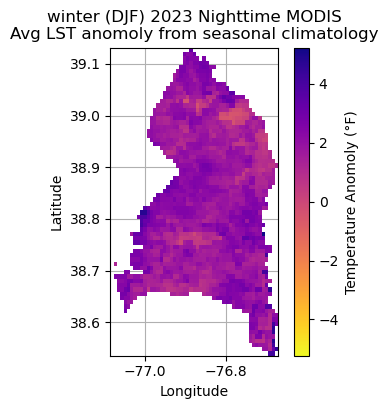

In [18]:
seasonOI = 'winter'
years = [year for year in range(2003,2024)]
TODOI = 'Night'
for YearOI in years:
    print(f'***RUNNING {YearOI}, {seasonOI}')
    avgDs = getSeasonalDs(seasonOI, YearOI, TODOI)
    saveSeasonalMap(avgDs, seasonOI, YearOI, TODOI)

#### 4. Upload to google drive: zip files

In [85]:
TOD = 'Night'
directory = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Monthly/'

In [21]:
import os
import zipfile
import shutil

def zip_directory(directory, zip_name):
    with zipfile.ZipFile(zip_name, 'w') as zipf:
        for root, _, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start=directory)
                zipf.write(file_path, arcname)
    print(f'{zip_name} created successfully.')

# Specify the TOD value and directory
TOD = 'Day'
directory = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Seasonal_png/'

# Name of the zip file to create
zip_name = f'MODIS_LST_seasonal_png_{TOD}.zip'

# Zip the directory
zip_directory(directory, zip_name)

# Move the zip file to the current working directory
shutil.move(zip_name, f'{directory}{zip_name}')


MODIS_LST_seasonal_png_Day.zip created successfully.


'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_png/MODIS_LST_seasonal_png_Day.zip'

### OLD Code using original tf names

In [59]:
# Open into an xarray.DataArray
def openTif(ID):
    fn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/{season}/{ID}'
    geotiff_da = rioxarray.open_rasterio(fn)
    geotiff_ds = geotiff_da.to_dataset('band')
    geotiff_ds = geotiff_ds.where(geotiff_ds[1] != 0)  
    geotiff_ds = geotiff_ds.assign_coords({'time': ID})
    return geotiff_ds
#files to run
tifTest = tifFiles[0:2]
data_arrays = [openTif(_id) for _id in tifTest]
composite_data_array = xr.concat(data_arrays, dim='time')
composite_data_array  = composite_data_array .rename_vars({1: 'LST'})
numFiles = (len(composite_data_array.time))
print(f'Arrays in use: {numFiles}')
composite_mean = composite_data_array.mean(dim='time', skipna=True)

#Save to .nc
startDate = str(tifTest[0][:-5])
endDate = str(tifTest[-1][:-5])
nc_file_path = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Monthly/{monthOfInterest}_{numFiles}files_{startDate}_{endDate}.nc'  # Replace with your desired file path
print(f'Saved to {nc_file_path}')
composite_data_array.to_netcdf(nc_file_path)

RasterioIOError: /panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/JF/1: No such file or directory

##### 3. Open Tif files and average them for a composite

In [57]:
season = 'JF'
TOD = 'Day'
directory = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/{season}/'
tifFiles = []
for file in os.listdir(directory):
    if '.tif' in file:
        if (str(file)[0] == '1'): 
            tifFiles.append(file)
print(tifFiles[0:5])
print(f'Files: {len(tifFiles)}')

['1-1-2003.tif', '1-1-2020.tif', '1-2-2020.tif', '1-3-2020.tif', '1-4-2020.tif']
Files: 650


In [3]:
# Open into an xarray.DataArray
def openTif(ID):
    fn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/{season}/{ID}'
    geotiff_da = rioxarray.open_rasterio(fn)
    geotiff_ds = geotiff_da.to_dataset('band')
    geotiff_ds = geotiff_ds.where(geotiff_ds[1] != 0)  
    geotiff_ds = geotiff_ds.assign_coords({'time': ID})
    return geotiff_ds
#files to run
tifTest = tifFiles[:]
data_arrays = [openTif(_id) for _id in tifTest]
composite_data_array = xr.concat(data_arrays, dim='time')
composite_data_array  = composite_data_array .rename_vars({1: 'LST'})
numFiles = (len(composite_data_array.time))
print(f'Arrays in use: {numFiles}')
composite_mean = composite_data_array.mean(dim='time', skipna=True)

#Save to .nc
startDate = str(tifTest[0][:-5])
endDate = str(tifTest[-1][:-5])
nc_file_path = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/{season}_{numFiles}files_{startDate}_{endDate}.nc'  # Replace with your desired file path
print(f'Saved to {nc_file_path}')
composite_data_array.to_netcdf(nc_file_path)

Arrays in use: 1238
Saved to /panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/JF_1238files_0Day_9Day.nc


Text(0.5, 1.0, 'JF Day')

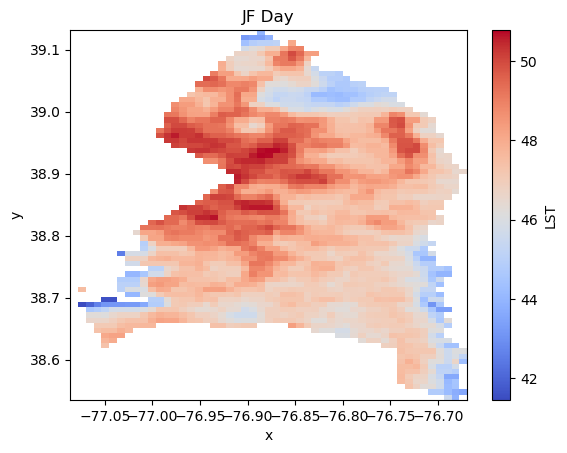

In [228]:
composite_mean['LST'] = (composite_mean['LST'] - 273.15) * 9/5 + 32
composite_mean['LST'].plot(cmap = 'coolwarm')
plt.title(season + ' ' +  TOD)

##### 3. Plot images already processed

In [387]:
#Get the min and max of daytime or nighttime
TOD = 'Night'
dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/'
fnMAM = f'{dirFn}MAM_1915files_0{TOD}_9{TOD}.nc'
fnSON = f'{dirFn}SON_2000files_0{TOD}_9{TOD}.nc'
fnJJA = f'{dirFn}JJA_1982files_0{TOD}_9{TOD}.nc'
def showMinMax(ds):
    tempMin = (ds['LST'].min().data)
    tempMax = (ds['LST'].max().data)
    minF = (tempMin - 273.15) * 9/5 + 32
    maxF = (tempMax - 273.15) * 9/5 + 32
    print(f' {minF} - {maxF} .... {tempMin} - {tempMax}')
showMinMax(dsDJF)
ds = xr.open_dataset(fnMAM)
showMinMax(ds)
try: ds = xr.open_dataset(fnJJA)
except: ds = xr.open_dataset(f'{dirFn}JJA_791files_0{TOD}_99{TOD}.nc')
showMinMax(ds)
ds = xr.open_dataset(fnSON)
showMinMax(ds)
# daytime-3.225999999999935, 122.84600000000005
# nighttime -1.6059999999999235 - 85.80200000000008

 0.26600000000005863 - 62.33000000000004 .... 255.52 - 290.0
 -1.6059999999999235 - 77.66600000000001 .... 254.48000000000002 - 298.52
 38.21000000000008 - 85.80200000000008 .... 276.6 - 303.04
 11.390000000000022 - 80.90600000000003 .... 261.7 - 300.32


80.02158055290809 101.087082568807


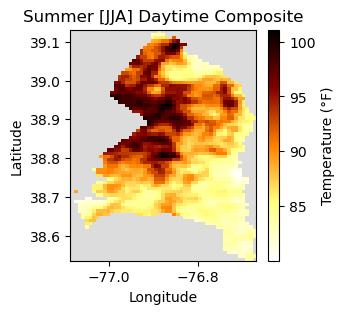

In [26]:
#Open a file and look at it again
dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/'
fnDec = f'{dirFn}Dec_682files_0Day_9Day.nc'
fnMAM = f'{dirFn}MAM_1915files_0Day_9Day.nc'
fnJF = f'{dirFn}JF_1238files_0Day_9Day.nc'
fnJJA = f'{dirFn}JJA_1982files_0Day_9Day.nc'

season_raw = 'JJA'
if season_raw == 'JJA': fn, season = fnJJA, 'Summer'
if season_raw == 'MAM': fn, season = fnMAM, 'Spring'
if season_raw == 'JF': fn = fnJF
if season_raw == 'Dec': fn = fnDec

ds = xr.open_dataset(fn)
dsAvg = ds.mean(dim='time', skipna=True)
fig, ax = plt.subplots()
ax.set_facecolor('gainsboro')
fig.set_figwidth(3)
fig.set_figheight(3)

#convert to farenheit
dsAvg['LST'] = (dsAvg['LST'] - 273.15) * 9/5 + 32
#dsAvg['LST'].plot(cmap = 'RdYlGn_r')
cbar = dsAvg['LST'].plot(ax=ax, cmap='afmhot_r', zorder = 0)
#afmhot_r, RdBu_r
ax.set_title(f'{season} [{season_raw}] Daytime Composite')
ax.set_xlabel('Longitude')  # Set the x-axis label
ax.set_ylabel('Latitude')   # Set the y-axis label
cbar.colorbar.set_label('Temperature (°F)')  # Set the colorbar label

print(dsAvg['LST'].min().data,(dsAvg['LST'].max().data))
#299.8286558627267 311.5317125382261

270.82243421052647 275.06412587412603


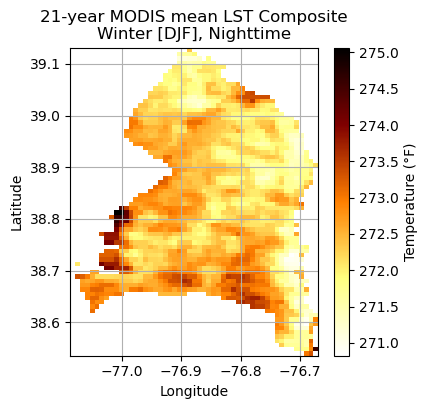

In [392]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
# File paths
dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/'
fnMAM = f'{dirFn}MAM_1915files_0{TOD}_9{TOD}.nc'
fnSON = f'{dirFn}SON_2000files_0{TOD}_9{TOD}.nc'
fnJJA = f'{dirFn}JJA_1982files_0{TOD}_9{TOD}.nc'
shapefile_path = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/tl_2020_24033_faces.shp'

season = 'DJF'
if season == 'JJA': 
    fn, seasonName = fnJJA, 'Summer'
    try: ds = xr.open_dataset(fn)
    except: ds = xr.open_dataset(f'{dirFn}JJA_791files_0{TOD}_99{TOD}.nc')

if season == 'MAM': 
    fn, seasonName = fnMAM, 'Spring'
    ds = xr.open_dataset(fn)
if season == 'SON': 
    fn, seasonName = fnSON, 'Autumn'
    ds = xr.open_dataset(fn)
if season == 'DJF':
    ds = dsDJF
    seasonName = 'Winter'

# Open dataset
dsAvg = ds.mean(dim='time', skipna=True)

# Convert to Fahrenheit
dsAvg['LST'] = (dsAvg['LST'])

# Plot
fig, ax = plt.subplots()
ax.set_facecolor('white')
fig.set_figwidth(4)
fig.set_figheight(4)
cbar = dsAvg['LST'].plot(ax=ax, cmap='afmhot_r')
#Night: -1.6059999999999235 - 85.80200000000008

# Set titles and labels
ax.set_title(f'21-year MODIS mean LST Composite\n{seasonName} [{season}], {TOD}time')
ax.set_xlabel('Longitude')  # Set the x-axis label
ax.set_ylabel('Latitude')   # Set the y-axis label
cbar.colorbar.set_label('Temperature (°F)')  # Set the colorbar label

# Add grid
ax.grid(True)
print(dsAvg['LST'].min().data, dsAvg['LST'].max().data)

plt.show()


In [3]:
#---DJF---
# Define file paths
TOD = 'Night'
dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/'
fnDec = f'{dirFn}Dec_682files_0{TOD}_9{TOD}.nc'
fnJF = f'{dirFn}JF_1239files_0{TOD}_9{TOD}.nc'

# Open datasets
dsDec = xr.open_dataset(fnDec)
dsJF = xr.open_dataset(fnJF)

# Add suffix to 'time' dimension
def add_suffix(time_values, suffix):
    return [str(time) + suffix for time in time_values]

# Apply suffixes
dsDec['time'] = add_suffix(dsDec['time'].values, '_DEC')
dsJF['time'] = add_suffix(dsJF['time'].values, '_JF')

# Merge datasets
dsDJF = xr.merge([dsDec, dsJF])
dsDJF['LST'][220]

<xarray.DataArray 'LST' (y: 72, x: 51)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x            (x) float64 -77.08 -77.07 -77.07 ... -76.69 -76.68 -76.67
  * y            (y) float64 39.13 39.12 39.11 39.1 ... 38.56 38.56 38.55 38.54
    time         <U17 '1180Night1.tif_JF'
    spatial_ref  int64 0

<xarray.DataArray 'LST' (y: 72, x: 51)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x            (x) float64 -77.08 -77.07 -77.07 ... -76.69 -76.68 -76.67
  * y            (y) float64 39.13 39.12 39.11 39.1 ... 38.56 38.56 38.55 38.54
    time         <U17 '1180Night1.tif_JF'
    spatial_ref  int64 0
25.18022680412373 32.952423357664316


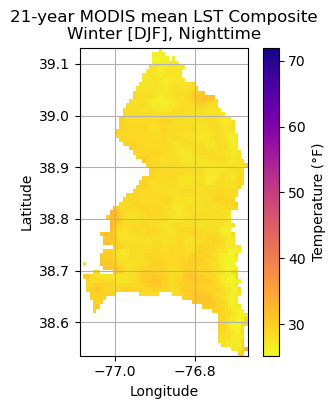

In [15]:
def saveFile(TOD, season):
    import xarray as xr
    import matplotlib.pyplot as plt
    import geopandas as gpd
    # File paths
    dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/'
    fnMAM = f'{dirFn}MAM_1915files_0{TOD}_9{TOD}.nc'
    fnSON = f'{dirFn}SON_2000files_0{TOD}_9{TOD}.nc'
    fnJJA = f'{dirFn}JJA_1982files_0{TOD}_9{TOD}.nc'
    shapefile_path = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/tl_2020_24033_faces.shp'
    
    if season == 'JJA': 
        fn, seasonName = fnJJA, 'Summer'
        try: ds = xr.open_dataset(fn)
        except: ds = xr.open_dataset(f'{dirFn}JJA_791files_0{TOD}_99{TOD}.nc')

    if season == 'MAM': 
        fn, seasonName = fnMAM, 'Spring'
        ds = xr.open_dataset(fn)
    if season == 'SON': 
        fn, seasonName = fnSON, 'Autumn'
        ds = xr.open_dataset(fn)
    if season == 'DJF':
        ds = dsDJF
        seasonName = 'Winter'
    ds['LST'] = (ds['LST'] - 273.15) * 9/5 + 32
    print(ds['LST'][220])
    # Open dataset
    dsAvg = ds.mean(dim='time', skipna=True)

    # Convert to Fahrenheit    

    # Plot
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    fig.set_figwidth(4)
    fig.set_figheight(4)
    colorScheme = 'plasma'
    cbar = dsAvg['LST'].plot(ax=ax, cmap=f'{colorScheme}_r', vmax = 72)
    #Night: -1.6059999999999235 - 85.80200000000008
    #Day: -3.225999999999935, 122.84600000000005

    # Read shapefile
    gdf = gpd.read_file(shapefile_path)
    gdf.boundary.plot(ax=ax, edgecolor='black', alpha = 0,linewidth = 0.15)

    # Set titles and labels
    ax.set_title(f'21-year MODIS mean LST Composite\n{seasonName} [{season}], {TOD}time')
    ax.set_xlabel('Longitude')  # Set the x-axis label
    ax.set_ylabel('Latitude')   # Set the y-axis label
    cbar.colorbar.set_label('Temperature (°F)')  # Set the colorbar label

    # Add grid
    ax.grid(True)
    output_filename = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/JPGs/Sequential/{TOD}time_{seasonName}_LST_PGCounty_{colorScheme}.png'
    plt.savefig(output_filename, format='png')

    print(dsAvg['LST'].min().data, dsAvg['LST'].max().data)

    plt.show()
seasonList = ['DJF', 'MAM', 'JJA', 'SON']
#for season in (seasonList): saveFile('Night', season)
saveFile(TOD, 'DJF')

#### Plots

In [11]:
import xarray as xr

# Define file paths
TOD = 'Day'
dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/'
fnDec = f'{dirFn}Dec_682files_0{TOD}_9{TOD}.nc'
fnJF = f'{dirFn}JF_1238files_0{TOD}_9{TOD}.nc'

# Open datasets
dsDec = xr.open_dataset(fnDec)
dsJF = xr.open_dataset(fnJF)

# Add suffix to 'time' dimension
def add_suffix(time_values, suffix):
    return [str(time) + suffix for time in time_values]

# Apply suffixes
dsDec['time'] = add_suffix(dsDec['time'].values, '_DEC')
dsJF['time'] = add_suffix(dsJF['time'].values, '_JF')

# Merge datasets
dsDJF = xr.merge([dsDec, dsJF])
dsDJF['LST'][220]
dsDJF

<xarray.Dataset>
Dimensions:      (x: 51, y: 72, time: 1920)
Coordinates:
  * x            (x) float64 -77.08 -77.07 -77.07 ... -76.69 -76.68 -76.67
  * y            (y) float64 39.13 39.12 39.11 39.1 ... 38.56 38.56 38.55 38.54
  * time         (time) <U15 '0Day1.tif_DEC' '0Day1.tif_JF' ... '9Day1.tif_JF'
    spatial_ref  int64 0
Data variables:
    LST          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/14)
    AREA_OR_POINT:           Area
    BandName:                SelfBand
    RepresentationType:      ATHEMATIC
    STATISTICS_COVARIANCES:  0.7635604837032346
    STATISTICS_MAXIMUM:      279.52
    STATISTICS_MEAN:         277.20532846715
    ...                      ...
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.87381948004335
    _FillValue:              0.0
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               SelfBand

In [12]:
# Load your xarray dataset (replace 'your_dataset.nc' with your actual dataset path)
def cropWindow(ds, lat, lon):
    # Find the nearest pixel indices
    lat_idx = ds.y.sel(y=lat, method='nearest').coords['y'].values.item()
    lon_idx = ds.x.sel(x=lon, method='nearest').coords['x'].values.item()

    # Find the index of the nearest pixel in the dataset
    lat_idx = ds.y.to_index().get_loc(lat_idx)
    lon_idx = ds.x.to_index().get_loc(lon_idx)

    # Determine the range for the 3x3 window
    lat_start = max(0, lat_idx - 1)
    lat_end = min(len(ds.y) - 1, lat_idx + 1)
    lon_start = max(0, lon_idx - 1)
    lon_end = min(len(ds.x) - 1, lon_idx + 1)
    cropped_ds = ds.isel(y=slice(lat_start, lat_end + 1), x=slice(lon_start, lon_end + 1))
    return(cropped_ds)

In [78]:
TOD = 'Day'
dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/'
fnMAM = f'{dirFn}MAM_1915files_0{TOD}_9{TOD}.nc'
fnSON = f'{dirFn}SON_2000files_0{TOD}_9{TOD}.nc'
fnJJA = f'{dirFn}JJA_1982files_0{TOD}_9{TOD}.nc'
ds = xr.open_dataset(fnMAM)
#38.981115178083684, -76.92359705897371
ds_CpAirport = ds.sel(y=38.981115178083684, x=-76.92359705897371, method='nearest')
ds_Bladensburg =  cropWindow(ds,38.938874253204084,-76.9338019195631)
ds_Patuxent = cropWindow(ds,39.02839417503231,-76.9338019195631)
ds_BaseAndrews = ds.sel(y=38.81083, x=-76.86694, method='nearest')
#38.81083°N 76.86694°W

In [71]:
#dataframe
import pandas as pd
dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/'
fnMAM = f'{dirFn}MAM_1915files_0{TOD}_9{TOD}.nc'
fnSON = f'{dirFn}SON_2000files_0{TOD}_9{TOD}.nc'
fnJJA = f'{dirFn}JJA_1982files_0{TOD}_9{TOD}.nc'
#fnJJA = f'{dirFn}JJA_791files_0{TOD}_99{TOD}.nc'
dsMAM = xr.open_dataset(fnMAM)
dsSON = xr.open_dataset(fnSON)
dsJJA = xr.open_dataset(fnJJA)

# Iterate through each time layer
def createDf(ds, average_values, season):
    for currentTime in ds.time:
        # Select the data for the current time layer
        time_layer = ds.sel(time=currentTime)
        # Calculate the average value of the time layer
        avg_value = time_layer['LST'].mean().item()
        std_value = time_layer['LST'].std().item()
        avg_x =  time_layer['x'].mean().item()
        avg_y = time_layer['y'].mean().item()
        # Store the result along with the time label
        average_values.append({'time': f'{currentTime.data}_{season}_{TOD}', 'average': avg_value, 'std': std_value, 'x': avg_x, 'y' : avg_y})
    return(average_values)

#Open each dataframe and append
average_values = []
dsYearly = [dsDJF, dsMAM, dsJJA, dsSON]
seasonYearly = ['DJF', 'MAM', 'JJA', 'SON']
i = 0
for ds in dsYearly:
    season = seasonYearly[i]
    print(f'processing {seasonYearly[i]}...')
    print(f'length DF: {len(average_values)}')
    #Select location
    #ds_CpAirport = ds.sel(y=38.981115178083684, x=-76.92359705897371, method='nearest')
    #ds_Bladensburg =  cropWindow(ds,38.939353469327315, -76.93399661434341)
    #ds_Patuxent = cropWindow(ds,39.02912607697547, -76.7996621982002)
    #ds_BaseAndrews = ds.sel(y=38.81083, x=-76.86694, method='nearest')
    ds_Beltsville = ds.sel(y=39.0302, x=-76.9315, method='nearest')
    
    average_values = createDf(ds_Beltsville, average_values, season)
    
    i = i+1

avg_df = pd.DataFrame(average_values)
avg_df.to_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/{TOD}_Beltsville.csv')

processing DJF...
length DF: 0
processing MAM...
length DF: 1920
processing JJA...
length DF: 3835
processing SON...
length DF: 5817


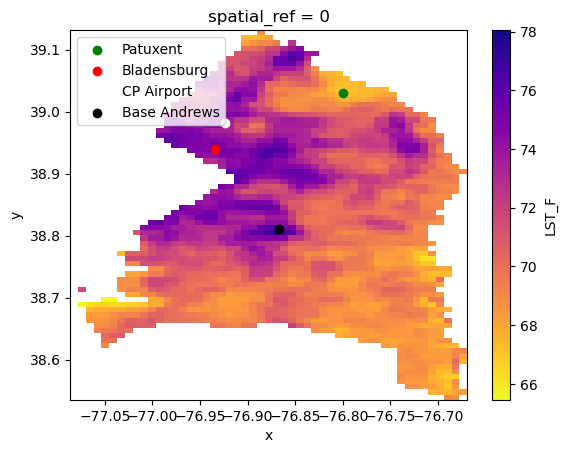

In [87]:
test = ds_All.mean(dim = 'time')
test['LST_F'] = (test['LST'] - 273.15) * 1.8 + 32
fig,ax = plt.subplots()
test['LST_F'].plot(cmap = 'plasma_r')
point_y,point_x = 39.02912607697547, -76.7996621982002
plt.scatter(point_x, point_y,  c = 'green', label = 'Patuxent')
plt.scatter(-76.93399661434341,38.939353469327315,  c = 'r', label = 'Bladensburg')
plt.scatter(-76.92359705897371,38.981115178083684,  c = 'white', label = 'CP Airport')
plt.scatter(-76.86694,38.81083,  c = 'black', label = 'Base Andrews')
import geopandas as gpd
shapefile_path = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/tl_2020_24033_faces.shp'
#gdf = gpd.read_file(shapefile_path)
#gdf.boundary.plot(ax=ax, edgecolor='black', alpha = 0,linewidth = 0.15)
#plt.xlim(-76.85,-76.75)
#plt.ylim(39,39.1)
plt.legend()

In [192]:
#Label with dates
import pandas as pd
TOD = 'Night'
szn = 'JF'
file = f'{szn}_{TOD}.csv'
fn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/{file}'
df = pd.read_csv(fn)
df = df.reset_index(drop = False)
df['ID'] = df['index'].apply(lambda x: f"{x}{TOD}1.tif_{szn}_DJF_{TOD}")
df.to_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/{file}')

In [338]:
# Load the CSV files into DataFrames
direc = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/'
csv_files = [f'{direc}SON_{TOD}.csv', f'{direc}DEC_{TOD}.csv', f'{direc}JJA_{TOD}.csv', f'{direc}MAM_{TOD}.csv', f'{direc}JF_{TOD}.csv']
dfs = [pd.read_csv(file) for file in csv_files]

# Concatenate all the CSV DataFrames
df_dates = pd.concat(dfs, ignore_index=True)
df_dates.to_csv(f'{direc}{TOD}time.csv')

### Now plot it!

In [172]:
#CLIMATOLOGY
loc = 'All'
tods = ['Day', 'Night']
TOD = tods[0]
import pandas as pd
currentDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/{TOD}_{loc}.csv')
cropped_df = currentDf.dropna(subset = 'average')
cropped_df = cropped_df.rename(columns={'time': 'ID'})
lookupDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/{TOD}time.csv')
df_merged = cropped_df.merge(lookupDf, on='ID', how='left')
df_merged['date'] = pd.to_datetime(df_merged['time'])
df_merged = df_merged.sort_values(by='date')
df_merged['month'] = df_merged['date'].dt.month
df_merged['year'] = df_merged['date'].dt.year
df_merged['stdUpper'] = (df_merged['std'] + df_merged['average'])
df_merged['stdLower'] = (df_merged['average'] - df_merged['std'])
df_merged['average'] = (df_merged['average'] - 273.15) * 9/5 + 32
df_merged['stdUpper'] = (df_merged['stdUpper'] - 273.15) * 9/5 + 32
df_merged['stdLower'] = (df_merged['stdLower'] - 273.15) * 9/5 + 32
df_merged['std'] = df_merged['stdUpper'] - df_merged['stdLower']
df_merged

,Unnamed: 0_x,ID,average,std,x,y,Unnamed: 0.3,Unnamed: 0.1,index,Unnamed: 0_y,OBJECTID,time,time_1,Unnamed: 0.2,level_0,date,month,year,stdUpper,stdLower
2454,3835,0Day1.tif_JJA_Day,96.837396,13.394425,-76.87789,38.833332,2682,0,0,0,1,7/4/2002,7/4/2002,NaN,NaN,2002-07-04,7,2002,103.534609,90.140183
3319,4928,1Day1.tif_JJA_Day,104.927704,11.097978,-76.87789,38.833332,2683,1,1,1,2,7/5/2002,7/5/2002,NaN,NaN,2002-07-05,7,2002,110.476692,99.378715
3405,5039,2Day1.tif_JJA_Day,89.575300,8.188486,-76.87789,38.833332,2684,2,2,2,3,7/6/2002,7/6/2002,NaN,NaN,2002-07-06,7,2002,93.669543,85.481057
3494,5150,3Day1.tif_JJA_Day,87.430609,8.184766,-76.87789,38.833332,2685,3,3,3,4,7/7/2002,7/7/2002,NaN,NaN,2002-07-07,7,2002,91.522992,83.338226
3666,5372,5Day1.tif_JJA_Day,95.094137,8.877120,-76.87789,38.833332,2687,5,5,5,6,7/9/2002,7/9/2002,NaN,NaN,2002-07-09,7,2002,99.532697,90.655577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1512,674Day1.tif_DEC_DJF_Day,48.431600,5.093474,-76.87789,38.833332,2674,674,674,674,675,12/24/2023,12/24/2023,674.0,674.0,2023-12-24,12,2023,50.978337,45.884863
949,1514,675Day1.tif_DEC_DJF_Day,56.857267,6.015340,-76.87789,38.833332,2675,675,675,675,676,12/25/2023,12/25/2023,675.0,675.0,2023-12-25,12,2023,59.864937,53.849597
952,1520,678Day1.tif_DEC_DJF_Day,52.443348,9.449226,-76.87789,38.833332,2678,678,678,678,679,12/28/2023,12/28/2023,678.0,678.0,2023-12-28,12,2023,57.167961,47.718736
954,1522,679Day1.tif_DEC_DJF_Day,50.342590,4.737626,-76.87789,38.833332,2679,679,679,679,680,12/29/2023,12/29/2023,679.0,679.0,2023-12-29,12,2023,52.711403,47.973777


In [72]:
#Day and Night climatology
#CLIMATOLOGY
loc = 'All'
tods = ['Day', 'Night']
TOD = tods[0]
import pandas as pd
currentDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/{TOD}_{loc}.csv')
cropped_df = currentDf.dropna(subset = 'average')
cropped_df = cropped_df.rename(columns={'time': 'ID'})
lookupDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/{TOD}time.csv')
df_merged1 = cropped_df.merge(lookupDf, on='ID', how='left')
df_merged1['date'] = pd.to_datetime(df_merged1['time'])

#TOD = tods[1]
#currentDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/{TOD}_{loc}.csv')
#cropped_df = currentDf.dropna(subset = 'average')
#cropped_df = cropped_df.rename(columns={'time': 'ID'})
#lookupDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/{TOD}time.csv')
#df_merged2 = cropped_df.merge(lookupDf, on='ID', how='left')
#df_merged2['date'] = pd.to_datetime(df_merged2['time'])
#df_merged = pd.concat([df_merged1, df_merged2], axis = 0)
df_merged = df_merged1

df_merged = df_merged.sort_values(by='date')
df_merged['month'] = df_merged['date'].dt.month
df_merged['year'] = df_merged['date'].dt.year
df_merged['stdUpper'] = (df_merged['std'] + df_merged['average'])
df_merged['stdLower'] = (df_merged['average'] - df_merged['std'])
df_merged['average'] = (df_merged['average'] - 273.15) * 9/5 + 32
df_merged['stdUpper'] = (df_merged['stdUpper'] - 273.15) * 9/5 + 32
df_merged['stdLower'] = (df_merged['stdLower'] - 273.15) * 9/5 + 32
df_merged['std'] = df_merged['stdUpper'] - df_merged['stdLower']
df_merged

,Unnamed: 0_x,ID,average,std,x,y,Unnamed: 0.3,Unnamed: 0.1,index,Unnamed: 0_y,OBJECTID,time,time_1,Unnamed: 0.2,level_0,date,month,year,stdUpper,stdLower
2454,3835,0Day1.tif_JJA_Day,96.837396,13.394425,-76.87789,38.833332,2682,0,0,0,1,7/4/2002,7/4/2002,NaN,NaN,2002-07-04,7,2002,103.534609,90.140183
3319,4928,1Day1.tif_JJA_Day,104.927704,11.097978,-76.87789,38.833332,2683,1,1,1,2,7/5/2002,7/5/2002,NaN,NaN,2002-07-05,7,2002,110.476692,99.378715
3405,5039,2Day1.tif_JJA_Day,89.575300,8.188486,-76.87789,38.833332,2684,2,2,2,3,7/6/2002,7/6/2002,NaN,NaN,2002-07-06,7,2002,93.669543,85.481057
3494,5150,3Day1.tif_JJA_Day,87.430609,8.184766,-76.87789,38.833332,2685,3,3,3,4,7/7/2002,7/7/2002,NaN,NaN,2002-07-07,7,2002,91.522992,83.338226
3666,5372,5Day1.tif_JJA_Day,95.094137,8.877120,-76.87789,38.833332,2687,5,5,5,6,7/9/2002,7/9/2002,NaN,NaN,2002-07-09,7,2002,99.532697,90.655577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1512,674Day1.tif_DEC_DJF_Day,48.431600,5.093474,-76.87789,38.833332,2674,674,674,674,675,12/24/2023,12/24/2023,674.0,674.0,2023-12-24,12,2023,50.978337,45.884863
949,1514,675Day1.tif_DEC_DJF_Day,56.857267,6.015340,-76.87789,38.833332,2675,675,675,675,676,12/25/2023,12/25/2023,675.0,675.0,2023-12-25,12,2023,59.864937,53.849597
952,1520,678Day1.tif_DEC_DJF_Day,52.443348,9.449226,-76.87789,38.833332,2678,678,678,678,679,12/28/2023,12/28/2023,678.0,678.0,2023-12-28,12,2023,57.167961,47.718736
954,1522,679Day1.tif_DEC_DJF_Day,50.342590,4.737626,-76.87789,38.833332,2679,679,679,679,680,12/29/2023,12/29/2023,679.0,679.0,2023-12-29,12,2023,52.711403,47.973777


In [73]:
import pandas as pd

# Function to map months to seasons and adjust the year for winter months
def month_to_season(month, year):
    if month in [3, 4, 5]:
        return 'spring', year
    elif month in [6, 7, 8]:
        return 'summer', year
    elif month in [9, 10, 11]:
        return 'autumn', year
    elif month == 12:
        return 'winter', year + 1
    elif month in [1, 2]:
        return 'winter', year

# Apply the season mapping function and adjust the year for winter months
df_merged['season'], df_merged['adjusted_year'] = zip(*df_merged.apply(lambda row: month_to_season(row['month'], row['year']), axis=1))

# Ensure no out-of-bound years
df_merged = df_merged[df_merged['adjusted_year'] >= df_merged['year'].min()]

# Group by 'adjusted_year' and 'season', and calculate the mean
df_grouped = df_merged.groupby(['adjusted_year', 'season']).mean().reset_index()

# Function to get the first day of the middle month of each season
def get_season_middle_date(row):
    season_middle_months = {
        'winter': 1,
        'spring': 4,
        'summer': 7,
        'autumn': 10
    }
    middle_month = season_middle_months[row['season']]
    return pd.Timestamp(year=row['adjusted_year'], month=middle_month, day=1)

# Apply the function to create the 'date' column
df_grouped['date'] = df_grouped.apply(get_season_middle_date, axis=1)

# Define the custom sort order for seasons
season_order = ['winter', 'spring', 'summer', 'autumn']

# Sort by year and season according to the custom order
df_grouped['season'] = pd.Categorical(df_grouped['season'], categories=season_order, ordered=True)
df_grouped = df_grouped.sort_values(by=['adjusted_year', 'season']).reset_index(drop=True)

# Display the result
df_grouped = df_grouped.groupby(df_grouped['season']).mean()
df_grouped.reset_index(inplace=True)
df_grouped.loc[df_grouped['season'] == 'winter', 'month'] = 1
median_df = df_grouped[['season', 'average', 'month']]

year_all = [year for year in range(2001, 2024)]
median_df['month'] = median_df['month'].replace(5, 1)
median_df['month'] = round(median_df['month']).astype(int)

median_df['date'] = pd.to_datetime(str(year_all[0]) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
median_df = median_df.sort_values(by='date')
dfs = []

for year in year_all[1:]:
    # Create a copy of median_df for the current year
    median_df_year = median_df.copy()
    # Update the 'date' column for the current year
    median_df_year['date'] = pd.to_datetime(str(year) + median_df_year['month'].astype(str) + str(1), format='%Y%m%d')
    # Append the DataFrame for the current year to the list
    dfs.append(median_df_year)

# Concatenate all DataFrames in the list into one DataFrame
median_df = pd.concat(dfs, ignore_index=True)

# Sort by 'date'
median_df = median_df.sort_values(by='date')

median_df.head()

/tmp/ipykernel_558546/2245014721.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_merged.groupby(['adjusted_year', 'season']).mean().reset_index()
/tmp/ipykernel_558546/2245014721.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_grouped.groupby(df_grouped['season']).mean()
/tmp/ipykernel_558546/2245014721.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,season,average,month,date
0,winter,44.384725,1,2002-01-01
1,spring,71.194086,4,2002-04-01
2,summer,85.496480,7,2002-07-01
3,autumn,69.119448,10,2002-10-01
4,winter,44.384725,1,2003-01-01


In [79]:
#LOCATION
TOD = 'Day'
#loc = 'BaseAndrews'
#loc = 'Patuxent'
#loc = 'Bladensburg'
#loc = 'CpAirport'
loc = 'Beltsville'
import pandas as pd
currentDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/{TOD}_{loc}.csv')
cropped_df = currentDf.dropna(subset = 'average')
cropped_df = cropped_df.rename(columns={'time': 'ID'})
lookupDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/{TOD}time.csv')
df_merged = cropped_df.merge(lookupDf, on='ID', how='left')
df_merged['date'] = pd.to_datetime(df_merged['time'])
df_merged = df_merged.sort_values(by='date')
df_merged['month'] = df_merged['date'].dt.month
df_merged['year'] = df_merged['date'].dt.year
df_merged['stdUpper'] = (df_merged['std'] + df_merged['average'])
df_merged['stdLower'] = (df_merged['average'] - df_merged['std'])
df_merged['average'] = (df_merged['average'] - 273.15) * 9/5 + 32
df_merged['stdUpper'] = (df_merged['stdUpper'] - 273.15) * 9/5 + 32
df_merged['stdLower'] = (df_merged['stdLower'] - 273.15) * 9/5 + 32
df_merged['std'] = df_merged['stdUpper'] - df_merged['stdLower']
df_merged.head()
df_MODIS_daily = df_merged 

In [ ]:

#---
import pandas as pd
# Function to map months to seasons and adjust the year for winter months
def month_to_season(month, year):
    if month in [3, 4, 5]:
        return 'spring', year
    elif month in [6, 7, 8]:
        return 'summer', year
    elif month in [9, 10, 11]:
        return 'autumn', year
    elif month == 12:
        return 'winter', year + 1
    elif month in [1, 2]:
        return 'winter', year
# Apply the season mapping function and adjust the year for winter months
df_merged['season'], df_merged['adjusted_year'] = zip(*df_merged.apply(lambda row: month_to_season(row['month'], row['year']), axis=1))
# Ensure no out-of-bound years
df_merged = df_merged[df_merged['adjusted_year'] >= df_merged['year'].min()]
# Group by 'adjusted_year' and 'season', and calculate the mean
df_grouped = df_merged.groupby(['adjusted_year', 'season']).mean().reset_index()
# Function to get the first day of the middle month of each season
def get_season_middle_date(row):
    season_middle_months = {
        'winter': 1,
        'spring': 4,
        'summer': 7,
        'autumn': 10
    }
    middle_month = season_middle_months[row['season']]
    return pd.Timestamp(year=row['adjusted_year'], month=middle_month, day=1)

# Apply the function to create the 'date' column
df_grouped['date'] = df_grouped.apply(get_season_middle_date, axis=1)

# Define the custom sort order for seasons
season_order = ['winter', 'spring', 'summer', 'autumn']

# Sort by year and season according to the custom order
df_grouped['season'] = pd.Categorical(df_grouped['season'], categories=season_order, ordered=True)
#df_grouped.loc[df_grouped['season'] == 'winter', 'month'] = 1
df_grouped = df_grouped.sort_values(by=['adjusted_year', 'season']).reset_index(drop=True)


# Display the result
dfMonthlies = df_grouped
#dfMonthlies.head()
subtracted_df = pd.merge(dfMonthlies,median_df, on='date', suffixes=('_dfMonthly', '_dfClimatology'))
subtracted_df['difference'] = subtracted_df['average_dfMonthly'] - subtracted_df['average_dfClimatology']
subtracted_df['percentage'] = 100*(subtracted_df['difference']/subtracted_df['average_dfClimatology'])
print(TOD, loc)
#subtracted_df['difference_std'] = abs(subtracted_df['std_dfMonthly'] - subtracted_df['std_dfClimatology'])

### Extra: Check with insitu temp data

/tmp/ipykernel_558546/1705653667.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  insitu_monthly = insitu_df.groupby(['month','year']).mean()
/tmp/ipykernel_558546/1705653667.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  insitu_monthlySTD = insitu_df.groupby(['month','year']).std()


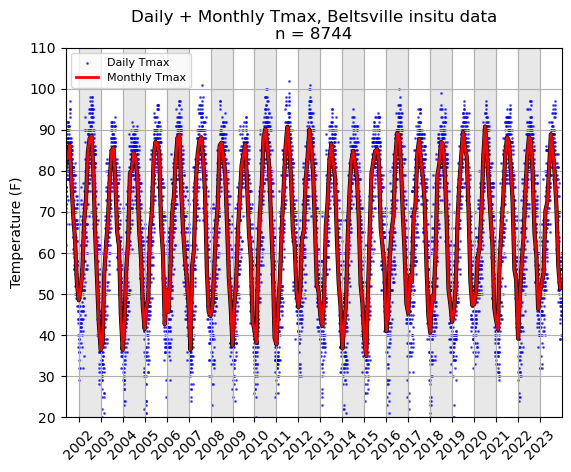

In [80]:
insitu_df = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/beltsville_usc00180700_ghcn_2000-2023.csv')
insitu_df = insitu_df[8:]
insitu_df.columns
insitu_df = insitu_df.rename(columns={" Daily Surface Air Temperatures (deg F) in " : "date", "Unnamed: 1": "Tmax", "Unnamed: 2": "Tmin", "Unnamed: 3" : "avg"})
import matplotlib.pyplot as plt
insitu_df['date'] = pd.to_datetime(insitu_df['date'], format='%m/%d/%Y')
insitu_df['Tmax'] = insitu_df['Tmax'].astype(float)
insitu_df['avg'] = insitu_df['avg'].astype(float)
insitu_df = insitu_df[insitu_df['Tmax'] >=-10] #remove outliers
insitu_df_daily = insitu_df
insitu_df['month'] = insitu_df['date'].dt.month
insitu_df['year'] = insitu_df['date'].dt.year
insitu_df.head()
#calculate monthlies
insitu_monthly = insitu_df.groupby(['month','year']).mean()
insitu_monthlySTD = insitu_df.groupby(['month','year']).std()
insitu_monthly.reset_index(inplace=True)
insitu_monthlySTD.reset_index(inplace=True)
insitu_monthly['date'] = pd.to_datetime(insitu_monthly['year'].astype(str) + insitu_monthly['month'].astype(str) + str(1), format='%Y%m%d')
insitu_monthlySTD['date'] = pd.to_datetime(insitu_monthlySTD['year'].astype(str) + insitu_monthlySTD['month'].astype(str) + str(1), format='%Y%m%d')
insitu_monthly = insitu_monthly.sort_values(by='date')
insitu_monthlySTD = insitu_monthlySTD.sort_values(by='date')


for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

plt.grid()
plt.ylabel(f'Temperature (F)')
plt.plot(insitu_monthly['date'], insitu_monthly['Tmax'],lw=3, c = 'black')
plt.scatter(insitu_df['date'], insitu_df['Tmax'],s=1, c = 'blue', alpha = 0.6,label = 'Daily Tmax')
plt.plot(insitu_monthly['date'], insitu_monthly['Tmax'],lw=2, c = 'red', label = 'Monthly Tmax')

#plt.fill_between(insitu_monthlySTD['date'], insitu_monthly['Tmax'] + insitu_monthlySTD['Tmax'],  insitu_monthly['Tmax'] - insitu_monthlySTD['Tmax'], color='blue', alpha=0.3, label='Std. deviation')

plt.title(f'Daily + Monthly Tmax, Beltsville insitu data\nn = {len(insitu_df)}')
plt.ylim(20,110)
from matplotlib.dates import YearLocator, DateFormatter
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.xlim(pd.Timestamp(2001, 6, 1), pd.Timestamp(2023, 12, 31))
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()


/tmp/ipykernel_558546/1821307766.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMonthlies = df_merged.groupby(['month','year']).mean()
/tmp/ipykernel_558546/1821307766.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMonthliesSTD = df_merged.groupby(['month','year']).std()
/tmp/ipykernel_558546/1821307766.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = dfMonthlies.groupby(['month']).mean(

<Figure size 1000x600 with 0 Axes>

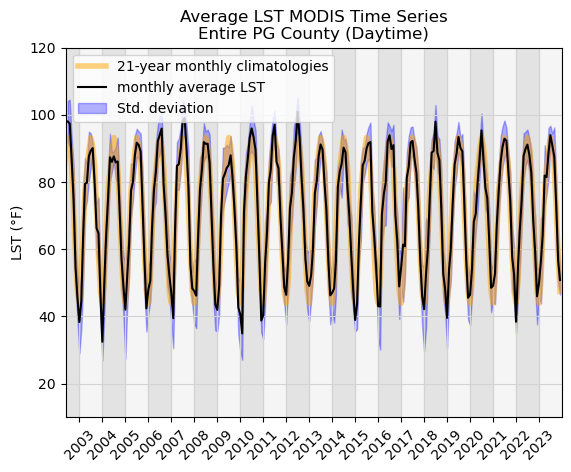

In [76]:
#Make plots - Monthly average
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]

plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

#get monthly avgs
dfMonthlies = df_merged.groupby(['month','year']).mean()
dfMonthliesSTD = df_merged.groupby(['month','year']).std()
dfMonthlies.reset_index(inplace=True)
dfMonthliesSTD.reset_index(inplace=True)
dfMonthlies['date'] = pd.to_datetime(dfMonthlies['year'].astype(str) + dfMonthlies['month'].astype(str) + str(1), format='%Y%m%d')
dfMonthlies = dfMonthlies.sort_values(by='date')
dfMonthliesSTD['date'] = pd.to_datetime(dfMonthliesSTD['year'].astype(str) + dfMonthliesSTD['month'].astype(str) + str(1), format='%Y%m%d')
dfMonthliesSTD = dfMonthliesSTD.sort_values(by='date')
#Get 20 year climatology
median_df = dfMonthlies.groupby(['month']).mean()
median_df.reset_index(inplace=True)
median_df['date'] = pd.to_datetime(str(year_all[0]) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
median_df_store = median_df
for year in year_all[1:]:#Add to it and plot
    median_df_store['date'] = pd.to_datetime(str(year) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
    median_df = pd.concat([median_df, median_df_store], ignore_index = True)
median_df = median_df.sort_values(by='date')
subtracted_df = dfMonthlies - median_df
#plot climatologies
plt.plot(median_df['date'], median_df['average'],c='orange', lw = 4, linestyle = '-', alpha = 0.5, label = '21-year monthly climatologies')

#Plot everything 
#plt.plot(df_merged['date'], df_merged['average'])

#plot monthlies
plt.plot(dfMonthlies['date'], dfMonthlies['average'], c = 'black', label = 'monthly average LST')

#try:plt.fill_between(dfMonthlies['date'], dfMonthlies[f'stdUpper'], dfMonthlies[f'stdLower'], color='blue', alpha=0.3, label='Std. Deviation')
try:plt.fill_between(dfMonthliesSTD['date'], dfMonthlies['average'] + dfMonthliesSTD['average'],  dfMonthlies['average'] - dfMonthliesSTD['average'], color='blue', alpha=0.3, label='Std. deviation')
except: print('no std')

#format
plt.title(f'Average LST MODIS Time Series\nEntire PG County ({TOD}time)')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('LST (°F)')
yearStart, yearEnd = 2002, 2023
plt.xlim(pd.Timestamp(yearStart, 6, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(10,120)
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_Climatology.png', format='png', dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

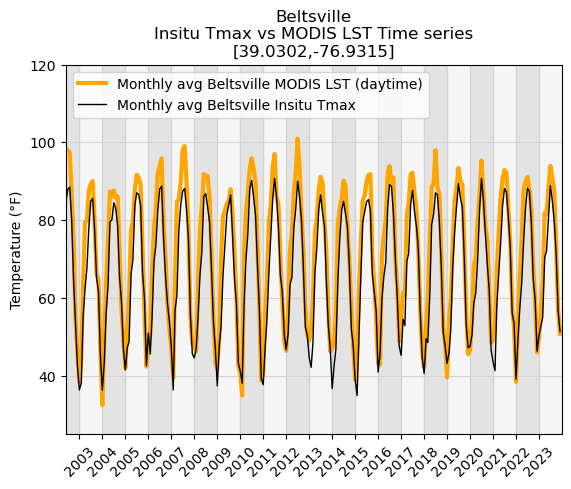

In [143]:
#Make plots - Monthly average
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

#plot Dailies
#plt.scatter(df_MODIS_daily['date'], df_MODIS_daily['average'], s=3, c = 'orange', label = 'Daily Beltsville MODIS LST (daytime)', zorder = 1, lw = 3)
#plt.scatter(insitu_df_daily['date'], insitu_df_daily['Tmax'],s = 1, c = 'black',  label = 'Daily Beltsville Insitu Tmax', zorder = 2, alpha = 1)

# Plot Monthlies
plt.plot(dfMonthlies['date'], dfMonthlies['average'], c = 'orange', label = 'Monthly avg Beltsville MODIS LST (daytime)', lw = 3)
plt.plot(insitu_monthly['date'], insitu_monthly['Tmax'],lw=1, c = 'black', label = 'Monthly avg Beltsville Insitu Tmax', alpha = 1)


#try:plt.fill_between(dfMonthlies['date'], dfMonthlies[f'stdUpper'], dfMonthlies[f'stdLower'], color='blue', alpha=0.3, label='Std. Deviation')
#try:plt.fill_between(dfMonthliesSTD['date'], dfMonthlies['average'] + dfMonthliesSTD['average'],  dfMonthlies['average'] - dfMonthliesSTD['average'], color='blue', alpha=0.2, label='Std. deviation')
#except: print('no std')
#plt.fill_between(insitu_monthlySTD['date'], insitu_monthly['Tmax'] + insitu_monthlySTD['Tmax'],  insitu_monthly['Tmax'] - insitu_monthlySTD['Tmax'], color='blue', alpha=0.3, label='Std. deviation')


#format
plt.title(f'Beltsville\nInsitu Tmax vs MODIS LST Time series\n[39.0302,-76.9315]')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('Temperature (°F)')
yearStart, yearEnd = 2002, 2023
plt.xlim(pd.Timestamp(yearStart, 6, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(25,120)
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
#plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_monthly_overlay_Beltsville.png', format='png', dpi=300)
plt.show()

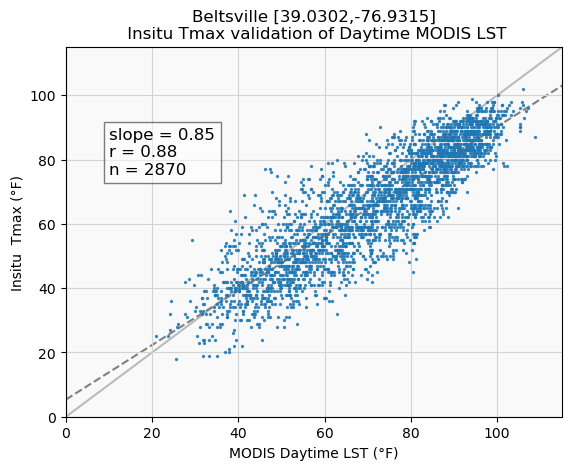

In [139]:
from scipy.stats import linregress
merged_df = pd.merge(df_MODIS_daily, insitu_df_daily, on='date', how='inner')
plt.grid(zorder = 1, c = 'lightgrey')
plt.axvspan(0,150, color='whitesmoke', alpha=0.5)
plt.scatter(merged_df['average'], merged_df['Tmax'],zorder = 2, s = 2, alpha = 0.8)
plt.ylabel('Insitu  Tmax (°F)')
plt.xlabel('MODIS Daytime LST (°F)')
#linregreess
slope, intercept, r_value, p_value, std_err = linregress(merged_df['average'], merged_df['Tmax'])
x_range = pd.Series([0, 150])
y_values = intercept + slope * x_range
plt.plot(x_range, y_values, color='grey', linestyle = '--', label=f'Linear regression line (y={slope:.2f}x+{intercept:.2f})',zorder = 1)

# Plot the y=x line
plt.plot([0, 150], [0, 150], color='grey', linestyle='-',zorder = 0)
cleaned_df = merged_df.dropna(subset=['Tmax', 'average'])

# Get the number of entries where both 'Tmax' and 'average' are not NaN
count = len(cleaned_df)
plt.title('Beltsville [39.0302,-76.9315]\n Insitu Tmax validation of Daytime MODIS LST')
textstr = f'slope = {slope:.2f}\nr = {r_value:.2f}\nn = {len(cleaned_df)}'
plt.text(10, 90, textstr, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

#plt.ylim(30,95)
plt.xlim(0,115)
plt.ylim(0,115)
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_daily_validation.png', format='png', dpi=300)

In [116]:
CPDf = subtracted_df

<Figure size 1000x600 with 0 Axes>

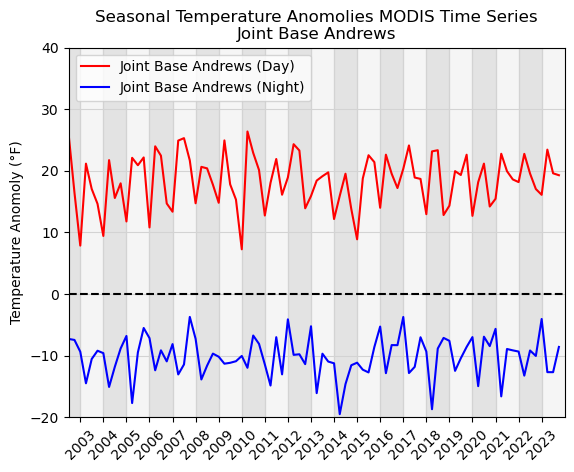

In [118]:
#Make plots - Monthly average
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

myLoc = 'Andrews'
#plot monthlies
if myLoc =='Andrews':
    plt.plot(AndrewsDf['date'], AndrewsDf['difference'], c = 'r', label = 'Joint Base Andrews (Day)')
    plt.plot(AndrewsNightDf['date'], AndrewsNightDf['difference'], c = 'b', label = 'Joint Base Andrews (Night)')
if myLoc =='CP':
    plt.plot(CPDf['date'], CPDf['difference'], c = 'r', label = 'CP Airport (Day)')
    plt.plot(CPNightDf['date'], CPNightDf['difference'], c = 'b', label = 'CP Airport (Night)')
if myLoc == 'blade':
    plt.plot(bladeDf['date'], bladeDf['difference'], c = 'r', label = 'Bladensburg (Day)')
    plt.plot(bladeNightDf['date'], bladeNightDf['difference'], c = 'blue', label = 'Bladensburg (Night)')
if myLoc == 'Patuxent':
    plt.plot(PatuxentDf['date'], PatuxentDf['difference'], c = 'r', alpha = 1,label = f'Patxuent Wildlife Refuge (Day)')
    plt.plot(PatuxentNightDf['date'], PatuxentNightDf['difference'], c = 'b', alpha = 1,label = f'Patuxent Wildlife Refuge (Night)')
#format
plt.title(f'Seasonal Temperature Anomolies MODIS Time Series\nJoint Base Andrews')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('Temperature Anomoly (°F)')
yearStart, yearEnd = 2002,2023
plt.xlim(pd.Timestamp(yearStart, 7, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(-20,40)

plt.axhline(y=0, color='black', linestyle='--')
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
#plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/dayNight/std_scale/{myLoc}_DayNight.png', format='png', dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

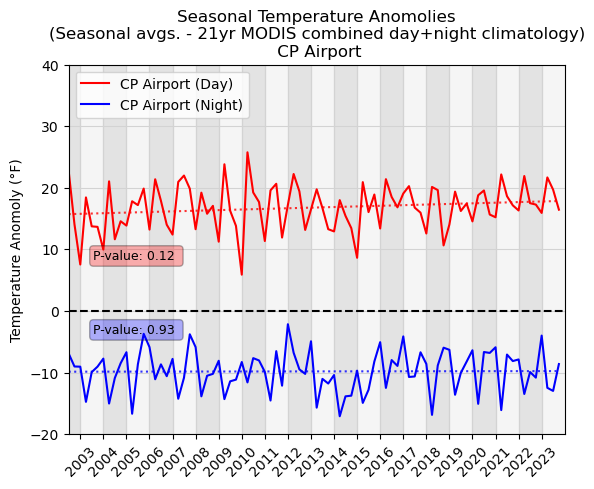

In [126]:
#Plot percentage with p value
from scipy.stats import linregress
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)
def getStats(df):
    df['date_num'] = (df['date'] - df['date'].min()).dt.days
    # Perform linear regression using scipy
    slope, intercept, r_value, p_value, std_err = linregress(df['date_num'], df['difference'])
    # Predict temperatures based on the model
    df['temp_pred'] = intercept + slope * df['date_num']
    return(slope, intercept, r_value,p_value, df['temp_pred'])
def assignP(P):
        if P < 0.05: pReport = '*'
        elif P < 0.01: pReport = '**'
        elif P < 0.005: pReport = '***'
        else: pReport = ' '
        return pReport
def plotLinRegress(df, nightDf):
    daySlope, dayInt, dayR, dayP, dayLine = getStats(df)
    plt.plot(df['date'], dayLine, linestyle = 'dotted', alpha = 0.8, c = 'r')
    nightSlope, nightInt, nightR, nightP, nightLine = getStats(nightDf)
    plt.plot(nightDf['date'], nightLine, linestyle = 'dotted', alpha = 0.8, c = 'b')
    #textbox with P val
    minDiff = df['difference'].min()
    textstr = f'P-value: {str(dayP)[0:4]}{assignP(dayP)}'
    props = dict(boxstyle='round', facecolor='red', alpha=0.3)
    plt.text(0.05, .5, textstr, transform=plt.gca().transAxes, fontsize=9,
             verticalalignment='top', bbox=props)
    textstr = f'P-value: {str(nightP)[0:4]}{assignP(nightP)}'
    props = dict(boxstyle='round', facecolor='blue', alpha=0.3)
    plt.text(0.05, .3, textstr, transform=plt.gca().transAxes, fontsize=9,
             verticalalignment='top', bbox=props)

myLoc = 'CP'
#plot monthlies
if myLoc == 'Andrews':
    plt.plot(AndrewsDf['date'], AndrewsDf['difference'], c = 'r', label = 'Joint Base Andrews (Day)')
    plt.plot(AndrewsNightDf['date'], AndrewsNightDf['difference'], c = 'b', label = 'Joint Base Andrews (Night)')
    plotLinRegress(AndrewsDf, AndrewsNightDf) 
elif myLoc == 'CP':
    plt.plot(CPDf['date'], CPDf['difference'], c = 'r', label = 'CP Airport (Day)')
    plt.plot(CPNightDf['date'], CPNightDf['difference'], c = 'b', label = 'CP Airport (Night)')
    plotLinRegress(CPDf, CPNightDf) 
elif myLoc == 'blade':
    plt.plot(bladeDf['date'], bladeDf['difference'], c = 'r', label = 'Bladensburg (Day)')
    plt.plot(bladeNightDf['date'], bladeNightDf['difference'], c = 'blue', label = 'Bladensburg (Night)')
    plotLinRegress(bladeDf, bladeNightDf) 
elif myLoc == 'Patuxent':
    plt.plot(PatuxentDf['date'], PatuxentDf['difference'], c = 'r', alpha = 1,label = f'Patxuent Wildlife Refuge (Day)')
    plt.plot(PatuxentNightDf['date'], PatuxentNightDf['difference'], c = 'b', alpha = 1,label = f'Patuxent Wildlife Refuge (Night)')
    plotLinRegress(PatuxentDf, PatuxentNightDf) 
    
#format
plt.title(f'Seasonal Temperature Anomolies\n(Seasonal avgs. - 21yr MODIS combined day+night climatology)\n {myLoc} Airport')
#plt.title(f'Seasonal Temperature Anomolies\n(Seasonal avgs. - 21yr MODIS climatology)\n {myLoc} Wildlife Refuge')

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('Temperature Anomoly (°F)')
yearStart, yearEnd = 2002,2023
plt.xlim(pd.Timestamp(yearStart, 7, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(-20,40)

plt.axhline(y=0, color='black', linestyle='--')
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/dayNight/std_scale/{myLoc}_DayNight_combined.png', format='png', dpi=300)
plt.show()

In [39]:
int(bladeDf['difference'].min())

5.862606308055362

<Figure size 1000x600 with 0 Axes>

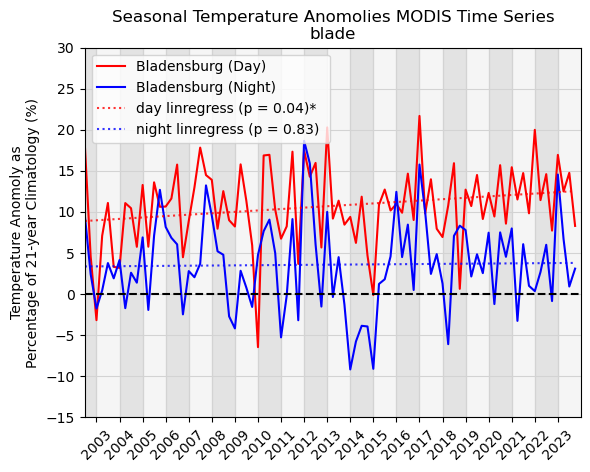

In [89]:
#Plot percentage with p value
from scipy.stats import linregress
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)
def assignP(P):
        if P < 0.05: pReport = '*'
        elif P < 0.01: pReport = '**'
        elif P < 0.005: pReport = '***'
        else: pReport = ' '
        return pReport
def getStats(df):
    df['date_num'] = (df['date'] - df['date'].min()).dt.days
    # Perform linear regression using scipy
    slope, intercept, r_value, p_value, std_err = linregress(df['date_num'], df['percentage'])
    # Predict temperatures based on the model
    df['temp_pred'] = intercept + slope * df['date_num']
    return(slope, intercept, r_value,p_value, df['temp_pred'])
def plotLinRegress(df, nightDf):
    daySlope, dayInt, dayR, dayP, dayLine = getStats(df)
    plt.plot(df['date'], dayLine, linestyle = 'dotted', alpha = 0.8, c = 'r', label = f'day linregress (p = {str(dayP)[0:4]}){assignP(dayP)}')
    nightSlope, nightInt, nightR, nightP, nightLine = getStats(nightDf)
    plt.plot(df['date'], nightLine, linestyle = 'dotted', alpha = 0.8, c = 'b', label = f'night linregress (p = {str(nightP)[0:4]}){assignP(nightP)}')

myLoc = 'blade'
#plot monthlies
if myLoc == 'Andrews':
    plt.plot(AndrewsDf['date'], AndrewsDf['percentage'], c = 'r', label = 'Joint Base Andrews (Day)')
    plt.plot(AndrewsNightDf['date'], AndrewsNightDf['percentage'], c = 'b', label = 'Joint Base Andrews (Night)')
    plotLinRegress(AndrewsDf, AndrewsNightDf) 
elif myLoc == 'CP':
    plt.plot(CPDf['date'], CPDf['percentage'], c = 'r', label = 'CP Airport (Day)')
    plt.plot(CPNightDf['date'], CPNightDf['percentage'], c = 'b', label = 'CP Airport (Night)')
    plotLinRegress(CPDf, CPNightDf) 
elif myLoc == 'blade':
    plt.plot(bladeDf['date'], bladeDf['percentage'], c = 'r', label = 'Bladensburg (Day)')
    plt.plot(bladeNightDf['date'], bladeNightDf['percentage'], c = 'blue', label = 'Bladensburg (Night)')
    plotLinRegress(bladeDf, bladeNightDf) 
elif myLoc == 'Patuxent':
    plt.plot(PatuxentDf['date'], PatuxentDf['percentage'], c = 'r', alpha = 1,label = f'Patxuent Wildlife Refuge (Day)')
    plt.plot(PatuxentNightDf['date'], PatuxentNightDf['percentage'], c = 'b', alpha = 1,label = f'Patuxent Wildlife Refuge (Night)')
    plotLinRegress(PatuxentDf, PatuxentNightDf) 
    
#format
plt.title(f'Seasonal Temperature Anomolies MODIS Time Series\n{myLoc}')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('Temperature Anomoly as\nPercentage of 21-year Climatology (%)')
yearStart, yearEnd = 2002,2023
plt.xlim(pd.Timestamp(yearStart, 7, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(-15,30)

plt.axhline(y=0, color='black', linestyle='--')
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
#plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/dayNight/std_scale/{myLoc}_DayNight_percent_P.png', format='png', dpi=300)
plt.show()

In [126]:
bladeDf_summer = AndrewsDf[AndrewsDf['season_dfMonthly'] == 'summer']
bladeNightDf_summer = AndrewsNightDf[AndrewsNightDf['season_dfMonthly'] == 'summer']

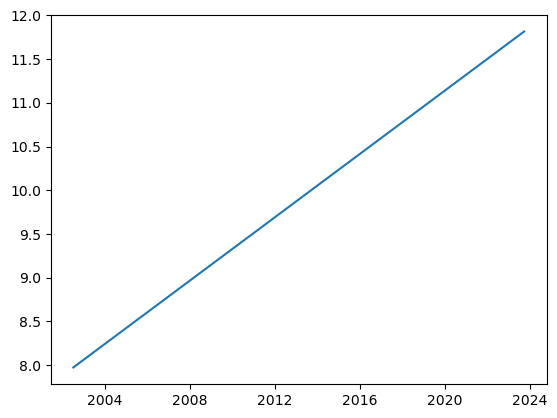

In [143]:
# Convert 'time' to numerical format (e.g., days since start)
def getStats(df):
    df['date_num'] = (df['date'] - df['date'].min()).dt.days

    # Perform linear regression using scipy
    slope, intercept, r_value, p_value, std_err = linregress(df['date_num'], df['percentage'])

    # Predict temperatures based on the model
    df['temp_pred'] = intercept + slope * df['date_num']
    #print(f"Slope: {slope}")
    #print(f"Intercept: {intercept}")
    #print(f"R-squared: {r_value**2}")
    #print(f"P-value: {p_value}")
    #print(f"Standard Error: {std_err}")
    return(slope, intercept, r_value,p_value, df['temp_pred'])

daySlope, dayInt, dayR, dayP, dayLine = getStats(CPDf)
plt.plot(CPDf['date'], dayLine)

<Figure size 1000x600 with 0 Axes>

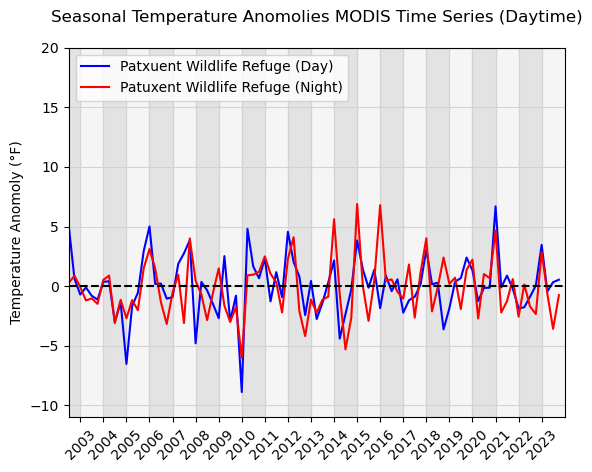

In [240]:
#Make plots - Monthly average
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

#plot monthlies
#plt.plot(AndrewsNightDf['date'], AndrewsNightDf['difference'], c = 'b', label = 'Joint Base Andrews (Night)')
#plt.plot(AndrewsDf['date'], AndrewsDf['difference'], c = 'r', label = 'Joint Base Andrews (Day)')

#plt.plot(CPDf['date'], CPDf['difference'], c = 'r', label = 'CP Airport (Day)')
#plt.plot(CPNightDf['date'], CPNightDf['difference'], c = 'b', label = 'CP Airport (Night)')

#plt.plot(bladeDf['date'], bladeDf['difference'], c = 'r', label = 'Bladensburg (Day)')
#plt.plot(bladeNightDf['date'], bladeNightDf['difference'], c = 'blue', label = 'Bladensburg (Night)')

plt.plot(PatuxentDf['date'], PatuxentDf['difference'], c = 'blue', alpha = 1,label = f'Patxuent Wildlife Refuge (Day)')
plt.plot(PatuxentNightDf['date'], PatuxentNightDf['difference'], c = 'red', alpha = 1,label = f'Patuxent Wildlife Refuge (Night)')

#try:plt.fill_between(dfMonthlies['date'], dfMonthlies[f'stdUpper'], dfMonthlies[f'stdLower'], color='blue', alpha=0.3, label='Std. Deviation')
#try:plt.fill_between(subtracted_df['date'], subtracted_df['difference'] + subtracted_df['difference_std'],  subtracted_df['difference'] - subtracted_df['difference_std'], color='blue', alpha=0.3, label='Std. deviation')
#except: print('no std')

#format
plt.title(f'Seasonal Temperature Anomolies MODIS Time Series ({TOD}time)\n')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('Temperature Anomoly (°F)')
yearStart, yearEnd = 2002,2023
plt.xlim(pd.Timestamp(yearStart, 7, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(-11,20)

plt.axhline(y=0, color='black', linestyle='--')
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
plt.show()

In [441]:
loc = 'Blade'
TOD = 'Night'
BladeDf.to_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/{loc}{TOD}_processed.csv')


NameError: name 'AllDf' is not defined

In [ ]:
#Make plots - Monthly average
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

#plot monthlies
plt.plot(AndrewsDf['date'], AndrewsDf['difference'], c = 'r', label = 'Joint Base Andrews')
plt.plot(CPDf['date'], CPDf['difference'], c = 'g', label = 'CP Airport')
plt.plot(bladeDf['date'], bladeDf['difference'], c = 'orange', label = 'Bladensburg')
plt.plot(subtracted_df['date'], subtracted_df['difference'], c = 'blue', alpha = 1,label = f'Patxuent Wildlife Refuge')
#plt.plot(subtracted_df['date'], subtracted_df['difference'], c = 'red', alpha = 1,label = f'Seasonal temperature anomolies\n[Seasonal average - 21 year seasonal climatology]')

#try:plt.fill_between(dfMonthlies['date'], dfMonthlies[f'stdUpper'], dfMonthlies[f'stdLower'], color='blue', alpha=0.3, label='Std. Deviation')
#try:plt.fill_between(subtracted_df['date'], subtracted_df['difference'] + subtracted_df['difference_std'],  subtracted_df['difference'] - subtracted_df['difference_std'], color='blue', alpha=0.3, label='Std. deviation')
#except: print('no std')

#format
plt.title(f'Seasonal Temperature Anomolies MODIS Time Series ({TOD}time)\n{loc} Wildlife Refuge')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('Temperature Anomoly (°F)')
yearStart, yearEnd = 2002,2023
plt.xlim(pd.Timestamp(yearStart, 7, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(-11,20)

plt.axhline(y=0, color='black', linestyle='--')
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
plt.show()

In [373]:
dayDf = subtracted_df #store

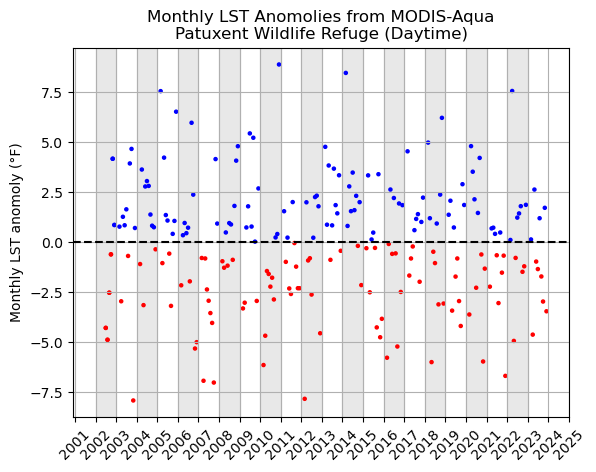

In [328]:
#seasonal anoms
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming subtracted_df is your DataFrame

# Define colors based on the values
colors = ['red' if value < 0 else 'blue' for value in subtracted_df['difference']]

# Plot the scatter plot with colors
plt.scatter(subtracted_df['date'], subtracted_df['difference'], c=colors, s=5)

# Plot the line with colors based on the values
for i, value in enumerate(subtracted_df['difference']):
    color = 'red' if value < 0 else 'blue'
    #plt.plot([subtracted_df['date'].iloc[i], subtracted_df['date'].iloc[i]], [0, value], color=color, alpha=1, lw=1)

# Plot the time series with error bars
# plt.errorbar(filtered_df['date'], filtered_df[f'satellite {wavelength}'], yerr=filtered_df[f'std {wavelength}'], fmt='-', color='b', linewidth=1, capsize=3, label='std deviation')
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)

plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Monthly LST anomoly (°F)')
plt.title(f'Monthly LST Anomolies from MODIS-Aqua\n{loc} Wildlife Refuge ({TOD}time)')
plt.show()

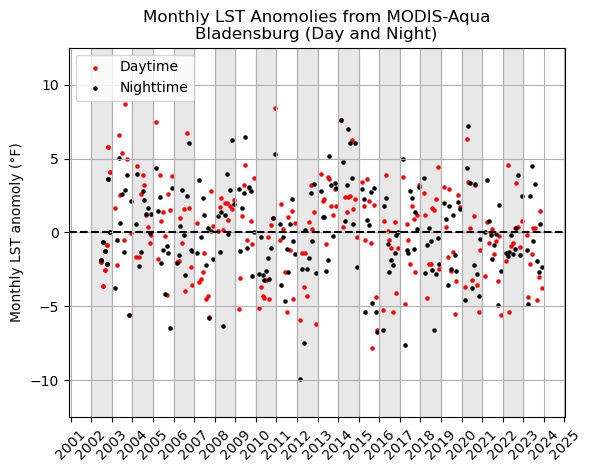

In [378]:
#seasonal anoms
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(dayDf['date'], dayDf['difference'], c='r', s=5, label = 'Daytime')
plt.scatter(subtracted_df['date'], subtracted_df['difference'], c='black', s=5, label = 'Nighttime')
# Plot the time series with error bars
# plt.errorbar(filtered_df['date'], filtered_df[f'satellite {wavelength}'], yerr=filtered_df[f'std {wavelength}'], fmt='-', color='b', linewidth=1, capsize=3, label='std deviation')
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(-12.5, 12.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Monthly LST anomoly (°F)')
plt.title(f'Monthly LST Anomolies from MODIS-Aqua\n{loc} (Day and Night)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dfMatchups = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/SQ_matchups/{satellite}_{source}Closest_2002 - 2023.csv')
dfMatchups['date'] = pd.to_datetime(dfMatchups[['year', 'month', 'days']])
dfMatchups = dfMatchups.groupby(['month','year']).median()
dfMatchups.reset_index(inplace=True)
dfMatchups['date'] = pd.to_datetime(dfMatchups['year'].astype(str) + dfMatchups['month'].astype(str) + str(1), format='%Y%m%d')
dfMatchups = dfMatchups.sort_values(by='date')
plt.figure(figsize=(10, 6))
median_df = dfMatchups.groupby(['month']).mean()
median_df.reset_index(inplace=True)
median_df['date'] = pd.to_datetime(str(year_all[0]) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
median_df_store = median_df
for year in year_all[1:]:#Add to it and plot
    median_df_store['date'] = pd.to_datetime(str(year) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
    median_df = pd.concat([median_df, median_df_store], ignore_index = True)
median_df = median_df.sort_values(by='date')
plt.plot(median_df['date'], median_df[f'satellite {wavelength}'],c='orange', lw = 3, linestyle = '-', alpha = 0.5, label = '21-year average')
#Highlight freshet
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)
for year in range(2002, 2024, 1):
    start_date = pd.Timestamp(year, 2, 26)
    end_date = pd.Timestamp(year, 5, 1)
    #plt.axvspan(start_date, end_date, color='red', alpha=0.2)
#plt.axvspan(0,0, color='red', alpha=0.5,label = 'Spring Freshet\n[56yr stream gauge median]')
color = 'blue'
#plt.scatter(dfMatchups['date'], dfMatchups[f'satellite {wavelength}'],c = color,s = 5)
plt.plot(dfMatchups['date'], dfMatchups[f'satellite {wavelength}'],c = color, alpha = 1, lw = 1,label = f'{wavelength}nm at Aero outflow\n[Monthly median]')
plt.plot(Aero_store['date'], Aero_store[f'satellite 560'],c = 'red', alpha = 1, linestyle = '--',lw = 2,label = f'560nm AERONET\n[Monthly median]')
# Fill the uncertainty area
try:plt.fill_between(dfMatchups['date'], dfMatchups[f'satellite {wavelength}'] - dfMatchups[f'std {wavelength}'], dfMatchups[f'satellite {wavelength}'] + dfMatchups[f'std {wavelength}'], color='blue', alpha=0.3, label='Std. Deviation')
except: print('no std')
plt.xlabel('Date')
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel(f'MODIS-Aqua {wavelength}nm')
yearStart, yearEnd = 2021,2023
plt.xlim(pd.Timestamp(yearStart, 1, 1), pd.Timestamp(yearEnd, 12, 31))
plt.title(f'{yearStart}-{yearEnd} MODIS-Aqua {wavelength}nm Time Series @ {source} site\nn={len(dfMatchups)}, avg. of {str(len(dfMatchups)/(2023-2002))[0:4]} pts/year')
plt.legend()
plt.grid(True)
plt.show()